__Ejercicio 1:__ Resolver oscilador amortiguado:
$$m \ddot x=-k x -b \dot x,$$
usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$.
Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos.
__Nota:__ El método de Runge-Kutta esta dentro de la familia de métodos simplécticos, es decir, preserva el volumen en el espacio de fase, algo particularmente útil cuanto tenemos sistemas que conservan la energia, a diferencia de _Euler_ que no lo hace. Observen que al no haber cantidades conservadas para el oscilador amortiguado, Euler funcione mucho mejor que en el otro caso, pues el oscilador amortiguado no conserva el volumen del espacio de fase.

In [1]:
## Definamos el método de Euler como lo hicimos en la tarea anterior para funciones de cualquier dimensión.

function Metodo_Euler(f,listt,inicial)
    
    h=listt[2]-listt[1]     ## La distancia entre los primeros dos elementos de la lista
    x=inicial
    listx=[]     ## Para guardar los resultados (puntos) de la solución

    push!(listx,x)     ## Tomamos el valor inicial y lo ponemos en la lista "listx"

    for i in 1:length(listt)-1     ## Aplicamos la relación de recurrencia
        x = x + f(x,listt[i])*h
        push!(listx,x)     ## Para cada iteración guardamos el punto obtenido en listx (sin repetirlos)
    end
    return listx
end

Metodo_Euler (generic function with 1 method)

In [2]:
## Definimos ahora el método de Runge-Kutta de orden 4 para funciones de cualquier dimensión.

function RK_4(f,listt,inicial)
    
    h=listt[2]-listt[1]
    x=inicial
    listx=[]
    push!(listx,x)

    for i in 1:length(listt)-1     ## Aplicamos la relación de recurrencia para el método de 4 orden con 4 iteraciones (como en la tarea pasada)
        it1=f(x,listt[i])
        it2=f(x+(h/2)*it1,listt[i]+h/2)
        it3=f(x+(h/2)*it2,listt[i]+h/2)
        it4=f(x+h*it3,listt[i+1])
        
        x=x+(h/6)*(it1+2*it2+2*it3+it4)
        push!(listx,x)     ## Guardamos cada valor obtenido en la lista "listx"
    end
   
   return listx
end

RK_4 (generic function with 1 method)

In [3]:
## Definamos la función del oscilador amortiguado a resolver

f(x,t)=[x[2],-x[1]-x[2]]

f (generic function with 1 method)

In [4]:
## Definamos también la lista de espacio temporal sobre la cual las funciones actuarán

listatemp=0:0.1:100

0.0:0.1:100.0

In [5]:
## Definimos nuestras funciones soluciones en términos de los métodos de Euler y Runge-Kutta de orden 4

Sol_Euler_x= map(x->x[1],Metodo_Euler(f,listatemp,[1,0]))
Sol_Euler_p= map(x->x[2],Metodo_Euler(f,listatemp,[1,0]))

Sol_RK_4x=map(x->x[1],RK_4(f,listatemp,[1,0]))
Sol_RK_4p=map(x->x[2],RK_4(f,listatemp,[1,0]));

In [6]:
## Grafiquemos la solución

using PyPlot

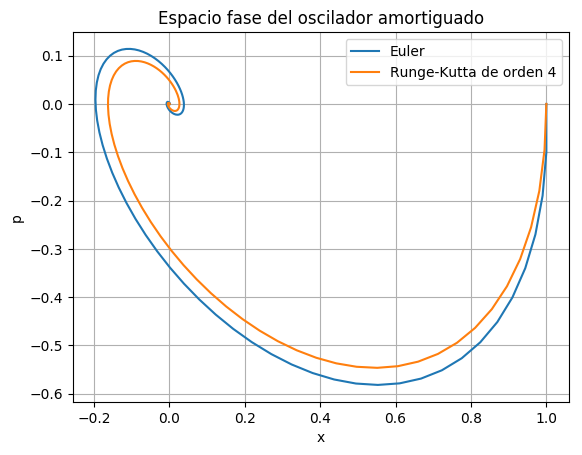

In [7]:
plot(Sol_Euler_x,Sol_Euler_p,label="Euler")
plot(Sol_RK_4x,Sol_RK_4p,label="Runge-Kutta de orden 4")

title("Espacio fase del oscilador amortiguado")
grid("on")
legend()
xlabel("x")
ylabel("p")
show();

__Ejercicio 2:__ Resolver el péndulo simple:
$$l \ddot\theta=-g \sin(\theta),$$
usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.

In [8]:
## Definimos primero la función a resolver tomando l=g=1

G(z,t)=[z[2],-sin(z[1])]

G (generic function with 1 method)

Esta función se define de esta forma pues, ya que $l=g=1$ \rightarrow  $\ddot\theta=-\sin(\theta)$

Tomando $\varphi$ la velocidad de $\theta$, entonces $\dot\theta=\varphi$, por lo que tenemos:

$$\dot{\theta}= \binom{\mathcal{\phi}}{\dot{\phi}} = -sin(\theta) $$
$\Longrightarrow$
$$\frac{d\bar{\theta}}{dt}=  F(\theta,\phi) = \binom{\mathcal{\phi}}{-sin(\theta)} = \binom{{x[2]}}{-sin(x[1])}$$ 

In [9]:
## Consideremos las siguientes condiciones:

S=18
T=4

4

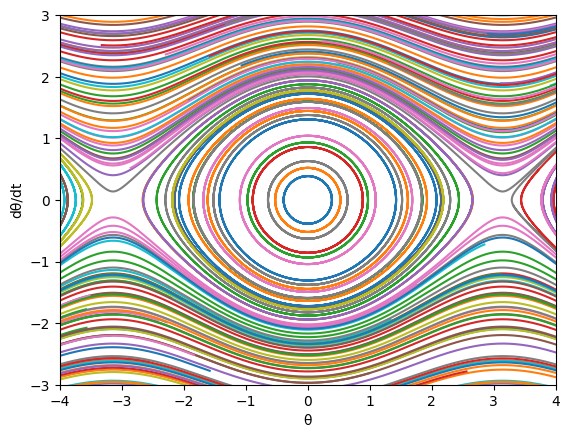

In [10]:
## Grafiquemos  ###################Checar la definición de funciones

for i in 1:400
    θ=S*(2*rand()-1);
    dθ=T*(2*rand()-1);


    θ_sol=map(x->x[1],RK_4(G,0:0.01:25,[θ,dθ]));
    dθ_sol=map(x->x[2],RK_4(G,0:0.01:25,[θ,dθ]));

    plot(θ_sol,dθ_sol)
end

xlabel("θ");
ylabel("dθ/dt");
axes()[:set_xlim]([-4,4])
axes()[:set_ylim]([-3,3])
show();

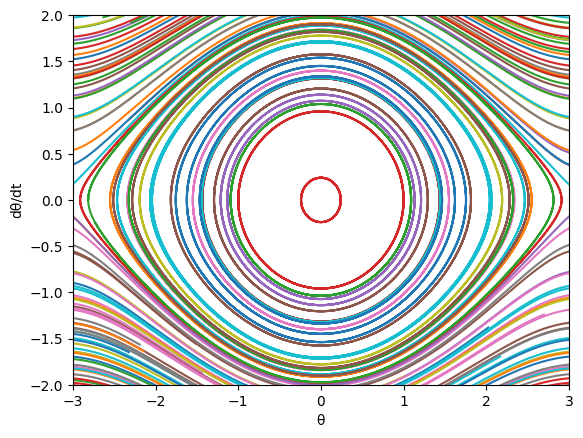

In [11]:
## Hagamos un "zoom"

## Grafiquemos  

for i in 1:400
    θ=S*(2*rand()-1);
    dθ=T*(2*rand()-1);


    θ_sol=map(x->x[1],RK_4(G,0:0.01:25,[θ,dθ]));
    dθ_sol=map(x->x[2],RK_4(G,0:0.01:25,[θ,dθ]));

    plot(θ_sol,dθ_sol)
end

xlabel("θ");
ylabel("dθ/dt");
axes()[:set_xlim]([-3,3])
axes()[:set_ylim]([-2,2])
show();

Podemos observar de la primer gráfica (sobretodo de la primera) que tenemos, tanto zonas estables (aquellas con elipses bien definidas), como inestables (aquellas en forma de circunferencias).
Para cada una de las soluciones existen 2 raíces ( esto es donde el sistema es constante) de modo que su energía total es cero (en esos puntos para determinadas $\theta$ ).

__Ejercicio 3:__ Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema:
$$\frac{dx}{dt}=x^2-1,$$
hay dos _puntos fijos_, ubicados en $1$ y $-1$, compruebe además que el $1$ es un _repulsor_ y el $-1$ un _atractor_. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

In [12]:
## Definamos primero la función
f(x,t)=x^2-1

f (generic function with 1 method)

In [13]:
## Definimos también una lista de variables temporales
tiempo=0:0.01:1

0.0:0.01:1.0

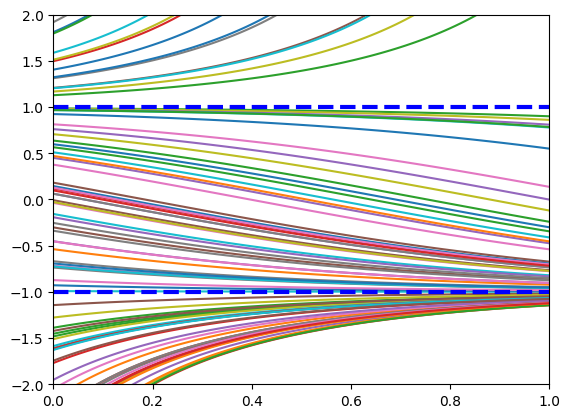

In [14]:
## Resolvamos para condiciones iniciales distintas
for i in 1:100
    inicial=3*(2*rand()-1)
    Sol=RK_4(f,tiempo,inicial)
    plot(tiempo,Sol)
end

plot([0,1],[1,1],linestyle="--",color="b",linewidth=3.0)
plot([0,1],[-1,-1],linestyle="--",color="b",linewidth=3.0)

axes()[:set_xlim]([0,1])
axes()[:set_ylim]([-2,2]);



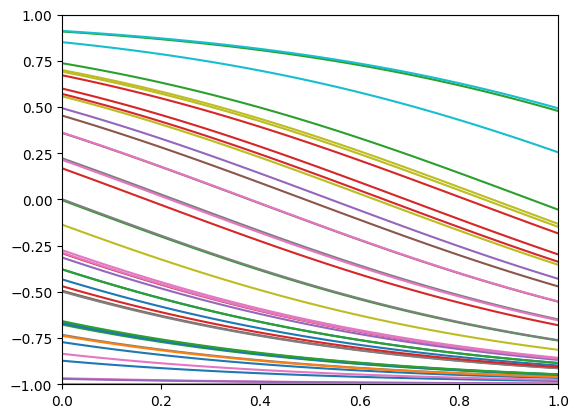

In [15]:
## cambiemos al intervalo que muestra sólo el espacio entre las líneas azules
for i in 1:100
    inicial=3*(2*rand()-1)
    Sol=RK_4(f,tiempo,inicial)
    plot(tiempo,Sol)
end

plot([0,1],[1,1])
plot([0,1],[-1,-1])

axes()[:set_xlim]([0,1])
axes()[:set_ylim]([-1,1]);

__Ejercicio 4:__ También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema:
$$\frac{dx}{dt}=x^2,$$
cual es el punto fijo único?, es un _atractor_ o un _repulsor_?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

In [16]:
## Definamos la función propuesta

h(x,t)=x^2

h (generic function with 1 method)

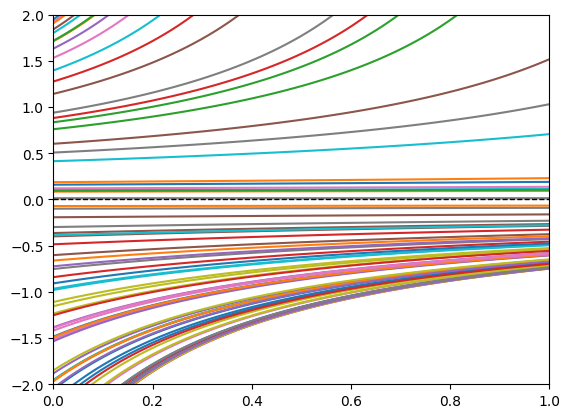

In [20]:
## Resolvamos usando RK_4 para distintas condiciones iniciales

for i in 1:100
    inicial=3*(2*rand()-1)
    Sol=RK_4(h,tiempo,inicial)
    plot(tiempo,Sol)
end

plot([0,1],[0,0],linestyle="--",color="k",linewidth=1.0)
axes()[:set_xlim]([0,1])
axes()[:set_ylim]([-2,2]);

Del resultado obtenido se puede observar que el único punto fijo de este sistema es el $x=0$. 
Ahora, si la condición inicial es $x_0 < 0$, se observa que las soluciones tienden a $x=0$ y si $x_0 > 0$, las soluciones tienden a infinito.
De modo que el punto fijo es al mismo tiempo un atractor y un repulsor dependiendo de la condición inicial del sistema.

__Ejercicio 5:__ Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones:
$$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)\vec x,$$
donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$
Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:
* $a=c=1$, $b=d=0$
* $a=c=-1$, $b=d=0$
* $a=1$, $b=-2$, $c=d=0$
* $a=1$, $b=-0.5$, $c=d=0$
* $a=d=0$, $b=-c=1$
* $a=d=1$, $b=-c=1$
* $a=d=-1$, $b=-c=1$
* $a=d=-1$, $b=-c=-1$
* $a=b=1$, $b=4,c=-2$
* $a=b=d=-1$, $c=0$

In [25]:
## Definamos primero el arreglo de la matriz a resolver y fijemos nuestros intervalos temporales
M(a,b,c,d,x,t)=[a*x[1]+b*x[2],c*x[1]+d*x[2]];

In [24]:
tiempo=0:0.1:20;

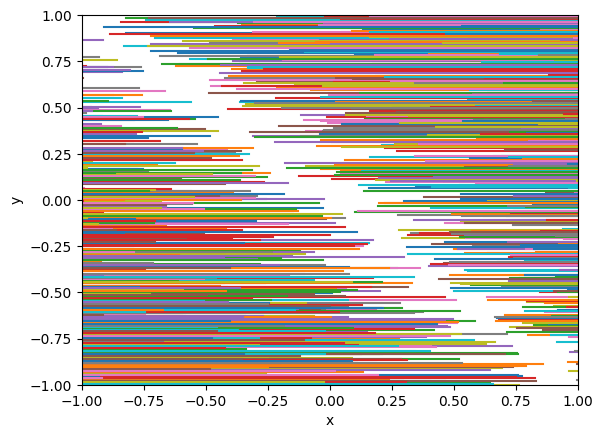

In [31]:
##Aplicaremos ahora las condiciones iniciales de cada uno de los puntos propuestos
M_1(x,t)=M(1,1,0,0,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    lista_x=map(x->x[1],RK_4(M_1,tiempo,[x0,y0]))
    lista_y=map(x->x[2],RK_4(M_1,tiempo,[x0,y0]))
    
    plot(lista_x,lista_y)
end

axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])

xlabel("x")
ylabel("y")
show();


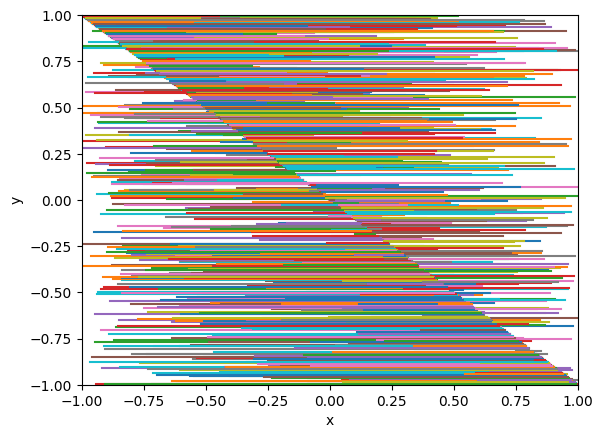

In [34]:
M_2(x,t)=M(-1,-1,0,0,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    lista_x=map(x->x[1],RK_4(M_2,tiempo,[x0,y0]))
    lista_y=map(x->x[2],RK_4(M_2,tiempo,[x0,y0]))
    
    plot(lista_x,lista_y)
end

axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])
xlabel("x")
ylabel("y")
show();


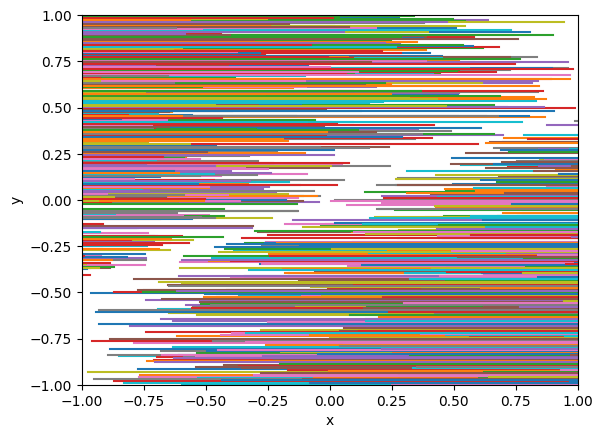

In [35]:
M_3(x,t)=M(1,-2,0,0,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    lista_x=map(x->x[1],RK_4(M_3,tiempo,[x0,y0]))
    lista_y=map(x->x[2],RK_4(M_3,tiempo,[x0,y0]))
    
    plot(lista_x,lista_y)
end

axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])
xlabel("x")
ylabel("y")
show();


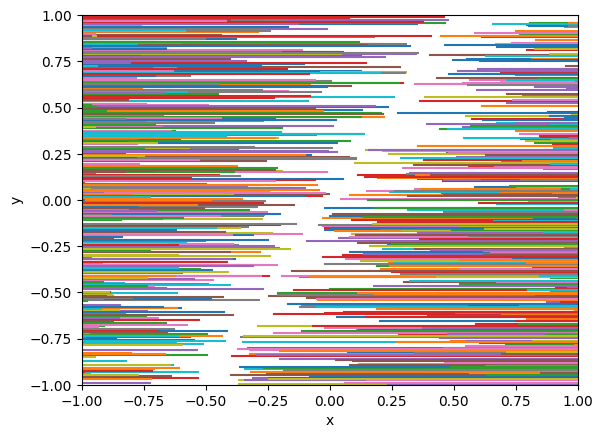

In [37]:
M_4(x,t)=M(1,-0.5,0,0,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    lista_x=map(x->x[1],RK_4(M_4,tiempo,[x0,y0]))
    lista_y=map(x->x[2],RK_4(M_4,tiempo,[x0,y0]))
    
    plot(lista_x,lista_y)
end

axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])
xlabel("x")
ylabel("y")
show();


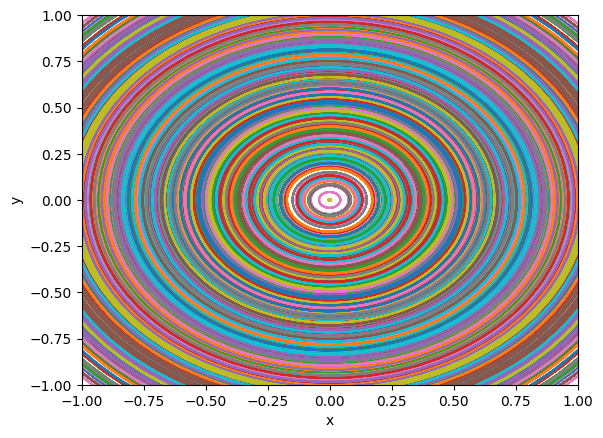

In [38]:
M_5(x,t)=M(0,1,-1,0,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    lista_x=map(x->x[1],RK_4(M_5,tiempo,[x0,y0]))
    lista_y=map(x->x[2],RK_4(M_5,tiempo,[x0,y0]))
 
    plot(lista_x,lista_y)
end

axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])
xlabel("x")
ylabel("y")
show();


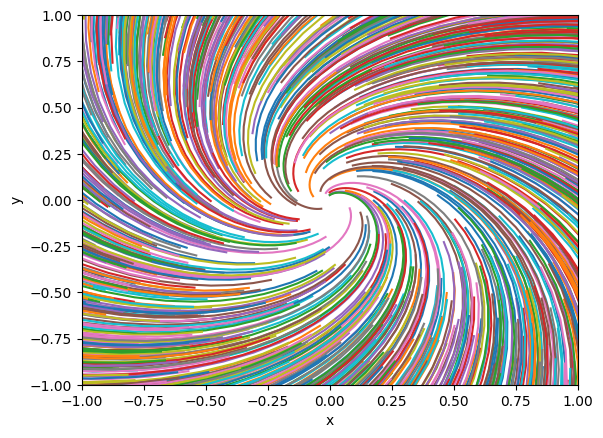

In [40]:
M_6(x,t)=M(1,1,-1,1,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    lista_x=map(x->x[1],RK_4(M_6,tiempo,[x0,y0]))
    lista_y=map(x->x[2],RK_4(M_6,tiempo,[x0,y0]))
    
    plot(lista_x,lista_y)
end

axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])
xlabel("x")
ylabel("y")
show();

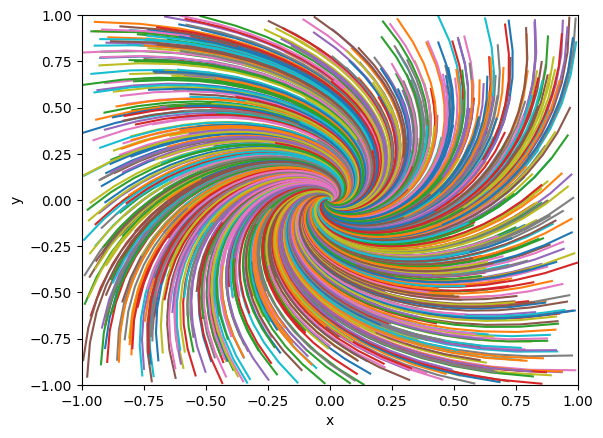

In [44]:
M_7(x,t)=M(-1,1,-1,-1,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    lista_x=map(x->x[1],RK_4(M_7,tiempo,[x0,y0]))
    lista_y=map(x->x[2],RK_4(M_7,tiempo,[x0,y0]))
    
    plot(lista_x,lista_y)
end

axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])
xlabel("x")
ylabel("y")
show();

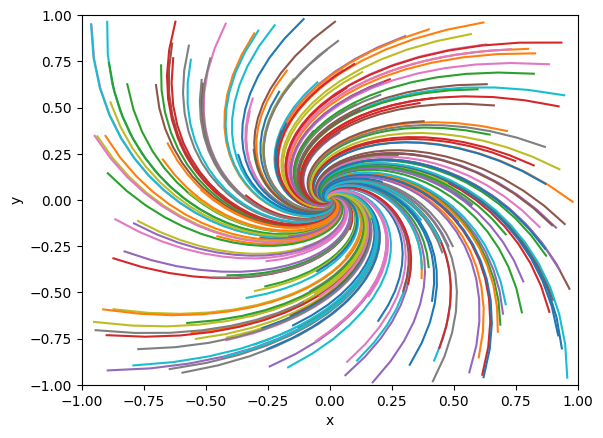

In [47]:
M_8(x,t)=M(-1,-1,1,-1,x,t)
for i in 1:200
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    lista_x=map(x->x[1],RK_4(M_8,tiempo,[x0,y0]))
    lista_y=map(x->x[2],RK_4(M_8,tiempo,[x0,y0]))
    
    plot(lista_x,lista_y)
end

axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])
xlabel("x")
ylabel("y")
show();


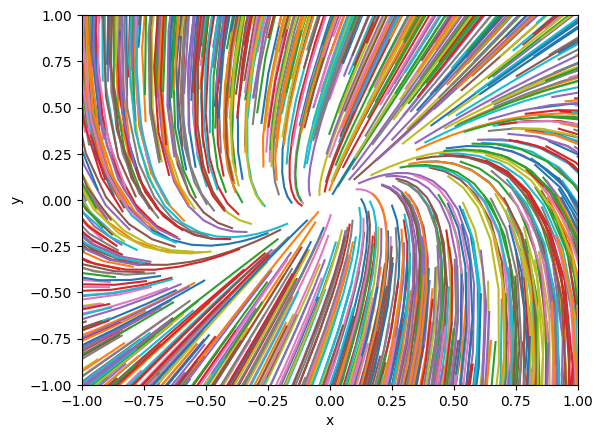

In [48]:
M_9(x,t)=M(1,1,-2,4,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    lista_x=map(x->x[1],RK_4(M_9,tiempo,[x0,y0]))
    lista_y=map(x->x[2],RK_4(M_9,tiempo,[x0,y0]))
    
    plot(lista_x,lista_y)
end

axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])
xlabel("x")
ylabel("y")
show();


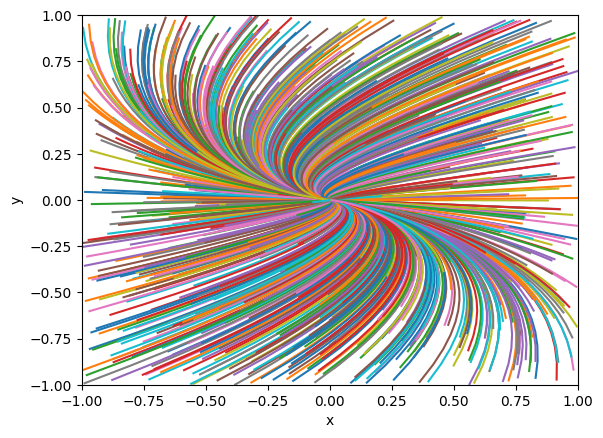

In [51]:
M_10(x,t)=M(-1,-1,0,-1,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    lista_x=map(x->x[1],RK_4(M_10,tiempo,[x0,y0]))
    lista_y=map(x->x[2],RK_4(M_10,tiempo,[x0,y0]))
    
    plot(lista_x,lista_y)
end

axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])
xlabel("x")
ylabel("y")
show();